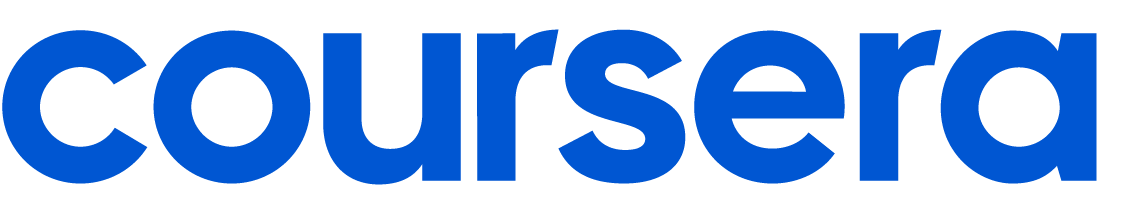

# Welcome to Challenge Labs!

Challenge labs provide CS & DS Coding Competitions with Prizes that Change Learners’ Lives!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly life changing like job interviews at real companies.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the retention prediction problem on a very unique and interesting group of subscribers, Coursera learners! On Coursera, learners can subscribe to sets of courses in order to gain full access to graded assignments, hands-on projects, and course completion certificates. One of the most common ways that learners subscribe to content is via [Specialization Subscriptions](https://www.coursera.support/s/article/216348103-Coursera-subscriptions?language=en_US#specialization), which give learners unlimited access to the courses in a specific specialization on a month-to-month basis.

Imagine that you are a new data scientist at Coursera and you are tasked with building a model that can predict which existing specialization subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the learner completes the specialization or reaches their learning goal and no longer needs the subscription
* the learner finds themselves to be too busy and cancels their subscription until a later time
* the learner determines that the specialization is not the best fit for their learning goals, so they cancel and look for something better suited

Regardless the reason, Coursera has a vested interest in understanding the likelihood of each individual learner to retain in their subscription so that resources can be allocated appropriately to support learners across the various stages of their learning journeys. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past specialization subscriptions that contain information about the learner, the specialization, and the learner's activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (509,837 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (217,921 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique specialization subscription. For each subscription, a single observation (`subscription_id`) is included as of a particular date (`observation_dt`) during which the subscription was active. This date was chosen at random from all the dates during which the subscription was active. In some instances it is soon after the subscription was initiated; in other instances, it is several months after the subscription was initiated and after several previous payments were made. Therefore, your model will have to be able to adapt to different stages of the subscription.

In addition to those identifier columns, the `train.csv` dataset also contains the target label for the task, a binary column `is_retained`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,subscription_id,Identifier,character,Unique identifier of each subscription
1,observation_dt,Identifier,date,The date on which the subscription was observed to calculate the features in the dataset. It was chosen at random amongst all the dates between the start of the subscription and the end of the subscription (before cancellation)
2,is_retained,Target,Integer,"TRAINING SET ONLY! 0 = the learner cancelled their subscription before next payment, 1 = the learner made an additional payment in this subscription"
3,specialization_id,Feature - Specialization Info,character,Unique identifier of a specialization (each subscription gives a learner access to a particular specialization)
4,cnt_courses_in_specialization,Feature - Specialization Info,integer,number of courses in the specialization
5,specialization_domain,Feature - Specialization Info,character,"primary domain of the specialization (Computer Science, Data Science, etc.)"
6,is_professional_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""professional certicate"" (a special type of specialization that awards completers with an industry-sponsored credential)"
7,is_gateway_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""gateway certificate"" (a special type of specialization geared towards learners starting in a new field)"
8,learner_days_since_registration,Feature - Learner Info,integer,Days from coursera registration date to the date on which the observation is made
9,learner_country_group,Feature - Learner Info,character,"the region of the world that the learner is from (United States, East Asia, etc.)"


## How to Submit your Predictions to Coursera

Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 217,921 rows (plus a header row). The first column should be `subscription_id` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription is retained__.

Your submission will show an error if you have extra columns (beyond `subscription_id` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [49]:
train_df = pd.read_csv("train.csv")
train_df.shape

c:\Users\finan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7,25,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(413955, 37)

In [4]:
test_df = pd.read_csv("test.csv")
test_df.shape

(217921, 36)

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [5]:
train_df.head()

,subscription_id,observation_dt,is_retained,specialization_id,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
0,--rKikbGEeyQHQqIvaM5IQ,2022-05-04,1.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,2321.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,73.783333,0.000000,68.0,0.0,20.0
1,-0XGzEq2EeyimBISGRuNeQ,2021-11-30,0.0,Q0Fc_Yl0EeqdTApgQ4tM7Q,6.0,Data Science,True,False,612.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,0.850000,0.000000,7.0,2.0,0.0
2,-1P9kOb6EeuRugq1Liq62w,2021-08-13,0.0,9kmimrDIEeqxzQqieMm42w,6.0,Business,True,True,27.0,Australia and New Zealand,...,0.0,1.0,12.0,2.0,False,1.833333,2.983333,2.0,1.0,18.0
3,-2ifTJZbEeuIuRKpAhovaw,2021-08-03,1.0,7lHCSlFIEeeffRIHljDI_g,5.0,Information Technology,True,True,120.0,United States,...,0.0,2.0,83.0,9.0,False,18.450000,7.100000,18.0,4.0,3.0
4,-5YKZbchEeufeAq6C_fAOw,2021-06-04,0.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,1228.0,India,...,1.0,1.0,61.0,4.0,False,29.566667,15.250000,18.0,8.0,1.0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413955 entries, 0 to 413954
Data columns (total 37 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   subscription_id                                   413955 non-null  object 
 1   observation_dt                                    413955 non-null  object 
 2   is_retained                                       413954 non-null  float64
 3   specialization_id                                 413954 non-null  object 
 4   cnt_courses_in_specialization                     413954 non-null  float64
 5   specialization_domain                             413953 non-null  object 
 6   is_professional_certificate                       413954 non-null  object 
 7   is_gateway_certificate                            413954 non-null  object 
 8   learner_days_since_registration                   413954 non-null  float64
 9   lear

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_retained,413954.0,0.543664,0.498090,0.0,0.00,1.000000,1.000000,1.000000
cnt_courses_in_specialization,413954.0,5.926637,1.759559,3.0,5.00,6.000000,7.000000,13.000000
learner_days_since_registration,413954.0,745.106720,950.799959,0.0,71.00,279.000000,1109.000000,3857.000000
learner_cnt_other_courses_active,413954.0,5.421735,13.819034,0.0,0.00,1.000000,4.000000,604.000000
learner_cnt_other_courses_paid_active,413954.0,1.281524,3.743262,0.0,0.00,0.000000,1.000000,215.000000
learner_cnt_other_courses_items_completed,413954.0,114.289404,303.469641,0.0,0.00,4.000000,90.000000,19439.000000
learner_cnt_other_courses_paid_items_completed,413954.0,62.943846,194.269892,0.0,0.00,0.000000,13.000000,6912.000000
learner_cnt_other_transactions_past,413954.0,1.966615,6.517240,0.0,0.00,0.000000,1.000000,474.000000
learner_other_revenue,413954.0,101.281442,353.679851,0.0,0.00,0.000000,49.000000,24069.920000
subscription_period_order,413954.0,2.477217,2.352873,1.0,1.00,2.000000,3.000000,19.000000


In [8]:
# count the number of categorical variables and numerical variables
categorical = [var for var in train_df.columns if train_df[var].dtype=='O']
numerical = [var for var in train_df.columns if train_df[var].dtype!='O']

print('There are {} categorical variables'.format(len(categorical)))
print('There are {} numerical variables'.format(len(numerical)))

There are 10 categorical variables
There are 27 numerical variables


<AxesSubplot:>

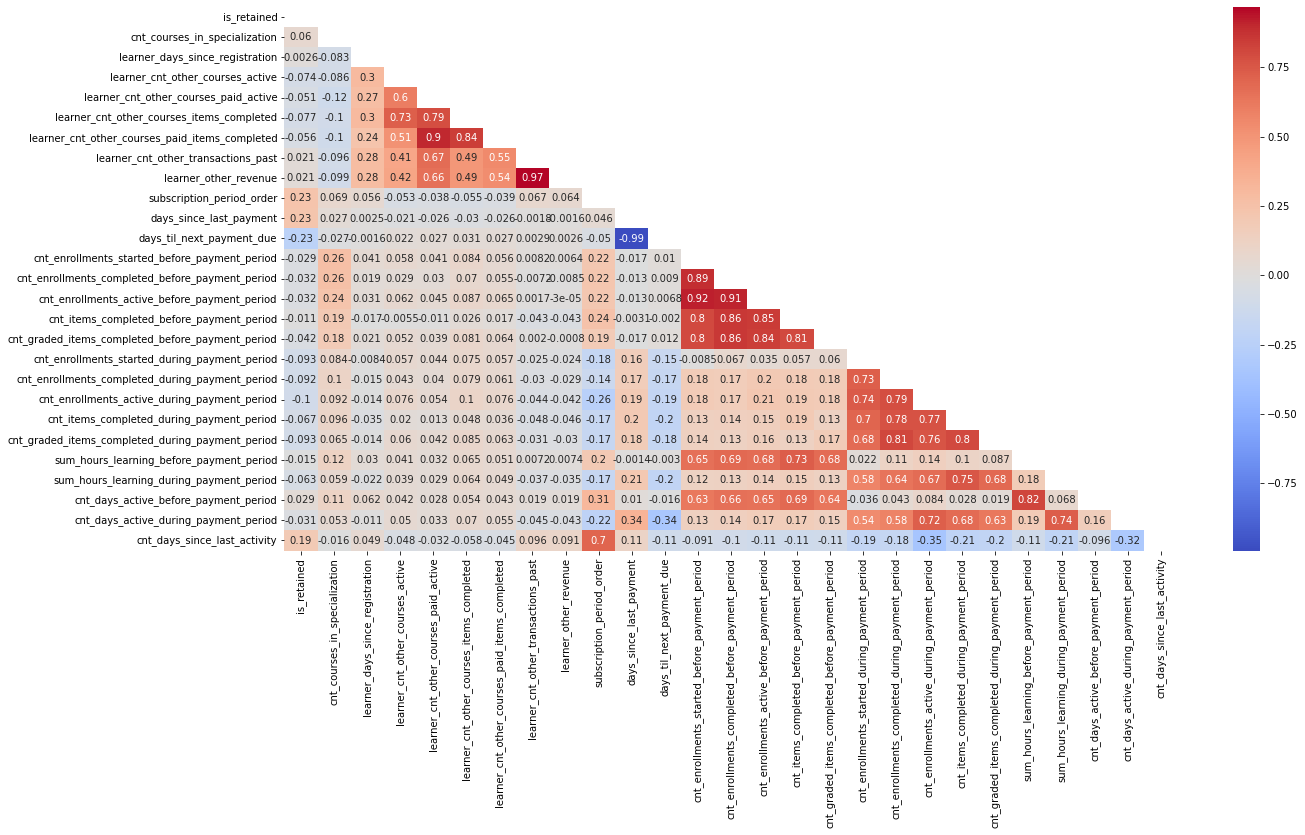

In [9]:
# do a correlation analysis
train_df.corr()

# plot the correlation matrix, showing only bottom triangle
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', mask=np.triu(train_df.corr()))

<AxesSubplot:>

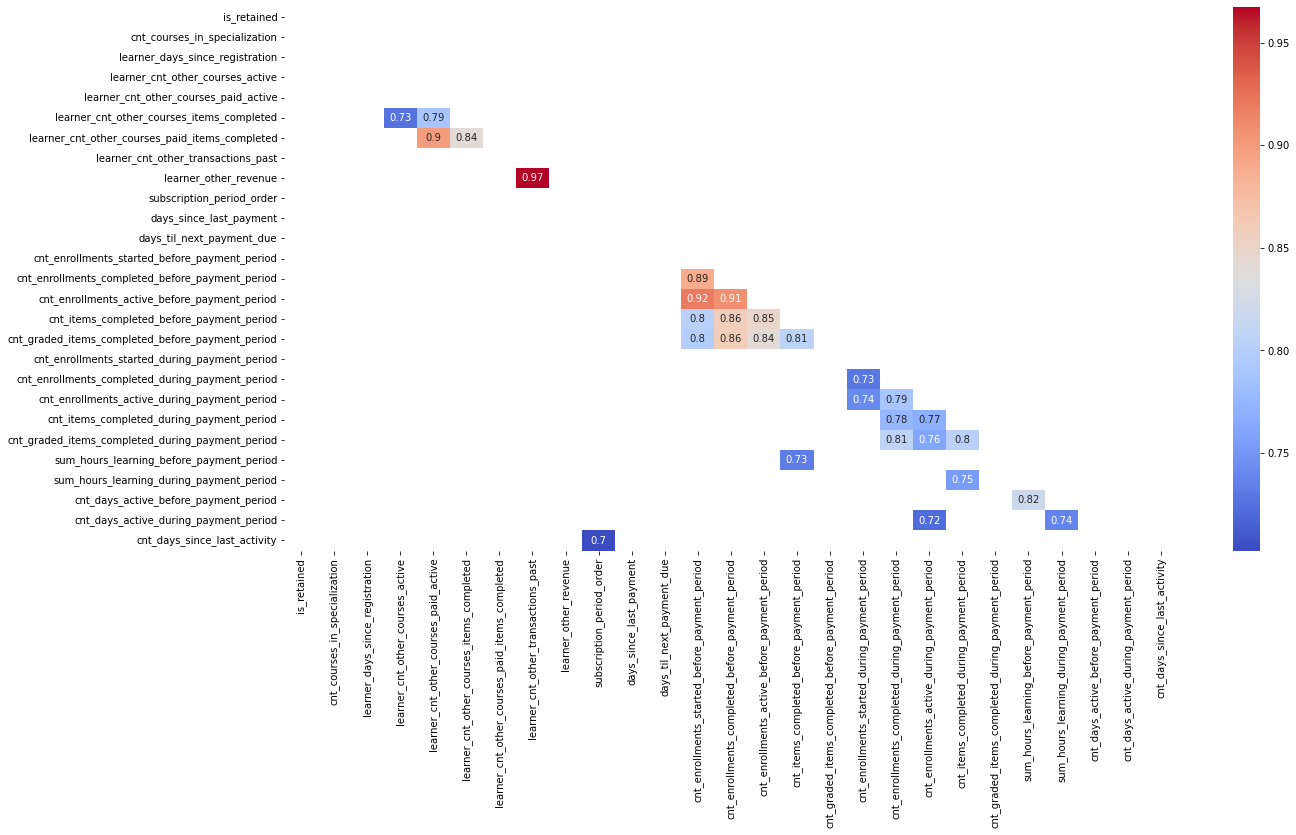

In [10]:
# plot only variables with correlation > 0.5
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr()[train_df.corr() > 0.7], annot=True, cmap='coolwarm', mask=np.triu(train_df.corr()))

In [11]:
# value counts of the target variable, 'is_retained'
train_df['is_retained'].value_counts(normalize=True)

1.0    0.543664
0.0    0.456336
Name: is_retained, dtype: float64

In [12]:
# length of value counts of specialization id
len(train_df['specialization_id'].value_counts())

742

In [13]:
# value count of specialization id, sorted by count
train_df['specialization_id'].value_counts(normalize=True).sort_values(ascending=False)

kr43OcbTEeqeNBKhfgCLyw    0.146560
fq9UWMbTEeqpthJ2RmWGow    0.106137
Z-5wCcbTEeqeNBKhfgCLyw    0.094895
7lHCSlFIEeeffRIHljDI_g    0.090435
dwzq23ZLEei12goo904QNg    0.032429
                            ...   
UkfsIiU8Eee3mhJ0exFVTA    0.000002
itbnM-sHEeuN1g4K4_q_Cw    0.000002
T62dhyBgEeylowpTGfKUBQ    0.000002
hxsd43d5Eem9GQpX1iIkrA    0.000002
TJvG4FKtEeyKpBLIBkHB1w    0.000002
Name: specialization_id, Length: 742, dtype: float64

There are a total of 742 unique specialization ids. The distribution of the specialization ids is highly skewed, with the top 5 specialization ids accounting for 47% of the total number of observations.

In [14]:
# value count of courses in specialization, sorted by count
train_df['cnt_courses_in_specialization'].value_counts().sort_values(ascending=False).sort_index()

3.0      17388
4.0      76537
5.0     107710
6.0      71462
7.0      46148
8.0      68501
9.0       8386
10.0     16812
12.0        47
13.0       963
Name: cnt_courses_in_specialization, dtype: int64

Most common number of courses in specialization is 5. Number of courses can range from 3 to 13.

There are 11 distinct specialization categories, the most being Data Science and the least being Math and Logic.

In [15]:
# check learner country
train_df['learner_country_group'].value_counts(normalize=True).sort_values(ascending=False)

United States                        0.472420
Northern Europe                      0.099627
India                                0.057726
Non-Brazil Latin America             0.055649
East Asia                            0.047356
Canada                               0.044374
Southern Europe                      0.042587
Southeast Asia                       0.033091
Africa and developing Middle East    0.030274
Eastern Europe                       0.029549
Middle East                          0.025520
Russia and neighbors                 0.021167
Australia and New Zealand            0.019113
Brazil                               0.014799
China                                0.006750
Name: learner_country_group, dtype: float64

In [16]:
# value count of learner gender
train_df['learner_gender'].value_counts().sort_values(ascending=False)

male       181652
unknown    119609
female     111585
other        1108
Name: learner_gender, dtype: int64

The number of active courses ranged from 0 all the way to 604. There are many outliers in this variable.

In [17]:
# value count other courses active
train_df['learner_cnt_other_courses_active'].value_counts(normalize=True).sort_index()

0.0      0.444245
1.0      0.142714
2.0      0.076441
3.0      0.053404
4.0      0.035750
           ...   
515.0    0.000002
533.0    0.000002
556.0    0.000002
589.0    0.000002
604.0    0.000002
Name: learner_cnt_other_courses_active, Length: 284, dtype: float64

In [18]:
# value count other courses paid active
train_df['learner_cnt_other_courses_paid_active'].value_counts(normalize=True).sort_index()

0.0      0.703047
1.0      0.108326
2.0      0.047945
3.0      0.028491
4.0      0.021365
           ...   
165.0    0.000002
166.0    0.000002
167.0    0.000002
188.0    0.000002
215.0    0.000002
Name: learner_cnt_other_courses_paid_active, Length: 107, dtype: float64

In [19]:
# write a function to plot the distribution of a variable
def plot_distribution(df, var):
    plt.figure(figsize=(25,10))
    sns.histplot(df[var])

In [20]:
train_df.columns

Index(['subscription_id', 'observation_dt', 'is_retained', 'specialization_id',
       'cnt_courses_in_specialization', 'specialization_domain',
       'is_professional_certificate', 'is_gateway_certificate',
       'learner_days_since_registration', 'learner_country_group',
       'learner_gender', 'learner_cnt_other_courses_active',
       'learner_cnt_other_courses_paid_active',
       'learner_cnt_other_courses_items_completed',
       'learner_cnt_other_courses_paid_items_completed',
       'learner_cnt_other_transactions_past', 'learner_other_revenue',
       'subscription_period_order', 'days_since_last_payment',
       'days_til_next_payment_due',
       'cnt_enrollments_started_before_payment_period',
       'cnt_enrollments_completed_before_payment_period',
       'cnt_enrollments_active_before_payment_period',
       'cnt_items_completed_before_payment_period',
       'cnt_graded_items_completed_before_payment_period',
       'is_subscription_started_with_free_trial',
      

In [94]:
train_df[['learner_days_since_registration', 'learner_cnt_other_courses_active',
       'learner_cnt_other_courses_paid_active',
       'learner_cnt_other_courses_items_completed',
       'learner_cnt_other_courses_paid_items_completed',
       'learner_cnt_other_transactions_past', 'learner_other_revenue',
       'subscription_period_order',]]

,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,learner_other_revenue,subscription_period_order
0,2321.0,8.0,0.0,88.0,0.0,0.0,0.00,6.0
1,612.0,52.0,2.0,209.0,75.0,1.0,49.41,1.0
2,27.0,5.0,0.0,5.0,0.0,0.0,0.00,1.0
3,120.0,0.0,0.0,0.0,0.0,0.0,0.00,4.0
4,1228.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
413950,142.0,0.0,0.0,0.0,0.0,0.0,0.00,3.0
413951,2598.0,21.0,16.0,827.0,719.0,12.0,518.00,1.0
413952,252.0,0.0,0.0,0.0,0.0,0.0,0.00,8.0
413953,169.0,0.0,0.0,0.0,0.0,0.0,0.00,6.0


In [22]:
(train_df['cnt_enrollments_started_before_payment_period']>train_df['cnt_enrollments_active_before_payment_period']).sum()

89553

In [41]:
test_df['testing'] = test_df[['sum_hours_learning_before_payment_period', 'cnt_days_active_before_payment_period']].apply(pd.to_numeric, errors='coerce').fillna(0).eval('sum_hours_learning_before_payment_period/cnt_days_active_before_payment_period')

test_df[['sum_hours_learning_before_payment_period','cnt_days_active_before_payment_period','testing']].sort_values('testing',ascending=False)

,sum_hours_learning_before_payment_period,cnt_days_active_before_payment_period,testing
56836,220.166667,5,44.033333
150478,350.300000,8,43.787500
114219,327.000000,9,36.333333
113526,306.750000,9,34.083333
2823,269.483333,10,26.948333
...,...,...,...
217885,0.000000,0,NaN
217900,0.000000,0,NaN
217901,0.000000,0,NaN
217905,0.000000,0,NaN


In [24]:
# find correlation between cnt_enrollments_started_before_payment_period and cnt_enrollments_completed_before_payment_period
train_df['cnt_enrollments_started_before_payment_period'].corr(train_df['cnt_enrollments_completed_before_payment_period'])

# find correlation between cnt_enrollments_started_before_payment_period and cnt_enrollments_active_before_payment_period
train_df['cnt_enrollments_started_before_payment_period'].corr(train_df['cnt_enrollments_active_before_payment_period'])

0.9196505186278019

## Preprocessing on the training data

In [81]:
train_df = pd.read_csv("train.csv")
train_df.shape

(413955, 37)

In [82]:
# Define preprocessing steps
def preprocess_data(df):    

    # drop null rows
    df = df.dropna()

    # remove highly correlated variables
    df = df.drop([ 'days_til_next_payment_due', # correlated with 'days_since_last_payment'
                   'specialization_id',
                   'subscription_id', 'observation_dt'
                   ], axis=1)

    # map learner country groups by geography
    # create a dictionary to map learner country groups
    country_map = {'Northern Europe': 'Europe',
                    'Australia and New Zealand': 'ANZ',
                    'United States': 'NorthAm',
                    'India': 'Asia',
                    'East Asia': 'Asia',
                        'Eastern Europe': 'Europe',
                        'Southern Europe': 'Europe',
                        'Southeast Asia': 'Asia', 
                        'Middle East': 'MENA',
                        'Africa and developing Middle East': 'MENA',
                        'China': 'Asia', 
                        'Canada': 'NorthAm',
                        'Non-Brazil Latin America': 'LatAm', 
                        'Brazil': 'LatAm',
                        'Russia and neighbors': 'Europe'}

    # map the learner country groups
    df['learner_country_group'] = df['learner_country_group'].map(country_map)

    # group 'other' gender into 'unknown'
    df['learner_gender'] = df['learner_gender'].replace('other', 'unknown')

    # -----------------------------------------------------------------------------------------------------------------------------------------------

    # create new feature, 'pct_learner_paid_active'
    try:
        df['pct_learner_paid_active'] = df['learner_cnt_other_courses_paid_active'] / df['learner_cnt_other_courses_active']
    except ZeroDivisionError:
        df['pct_learner_paid_active']=0

    # create new feature, 'pct_learner_paid_items_completed'
    try:
        df['pct_learner_paid_items_completed'] = df['learner_cnt_other_courses_paid_items_completed'] / df['learner_cnt_other_courses_items_completed']
    except ZeroDivisionError:
        df['pct_learner_paid_items_completed']=0

    # create new feature, 'revenue_per_transaction'
    try:
        df['revenue_per_transaction'] = df['learner_other_revenue'] / df['learner_cnt_other_transactions_past']
    except ZeroDivisionError:
        df['revenue_per_transaction']=0

    # -----------------------------------------------------------------------------------------------------------------------------------------------

    # create new feature, 'pct_enrollments_active_before_payment_period'
    try:
        df['pct_enrollments_active_before_payment_period'] = df['cnt_enrollments_active_before_payment_period'] / df['cnt_enrollments_started_before_payment_period']
    except ZeroDivisionError:
        df['pct_enrollments_active_before_payment_period']=0
    
    # create new feature, 'pct_enrollments_completed_before_payment_period'
    try:
        df['pct_enrollments_completed_before_payment_period'] = df['cnt_enrollments_completed_before_payment_period'] / df['cnt_enrollments_started_before_payment_period']
    except ZeroDivisionError:
        df['pct_enrollments_completed_before_payment_period']=0

    # create new feature, 'pct graded items completed before payment period'
    try:
        df['pct_graded_items_completed_before_payment_period'] = df['cnt_graded_items_completed_before_payment_period'] / df['cnt_items_completed_before_payment_period']
    except ZeroDivisionError:
        df['pct_graded_items_completed_before_payment_period']=0

    # -----------------------------------------------------------------------------------------------------------------------------------------------

    # create new feature, 'pct_enrollments_active_during_payment_period'
    try:
        df['pct_enrollments_active_during_payment_period'] = df['cnt_enrollments_active_during_payment_period'] / df['cnt_enrollments_started_during_payment_period']
    except ZeroDivisionError:
        df['pct_enrollments_active_during_payment_period']=0
        
    # create new feature, 'pct_enrollments_completed_during_payment_period'
    try:
        df['pct_enrollments_completed_during_payment_period'] = df['cnt_enrollments_completed_during_payment_period'] / df['cnt_enrollments_started_during_payment_period']
    except ZeroDivisionError:
        df['pct_enrollments_completed_during_payment_period']=0

    # create new feature, 'pct_graded_items_completed_during_payment_period'
    try:
        df['pct_graded_items_completed_during_payment_period'] = df['cnt_graded_items_completed_during_payment_period'] / df['cnt_items_completed_during_payment_period']
    except ZeroDivisionError:
        df['pct_graded_items_completed_during_payment_period']=0

    # -----------------------------------------------------------------------------------------------------------------------------------------------

    # create new feature, 'hrs_per_day_active_before_payment_period'
    try:
        df['hrs_per_day_active_before_payment_period'] = df['sum_hours_learning_before_payment_period'] / df['cnt_days_active_before_payment_period']
    except ZeroDivisionError:
        df['hrs_per_day_active_before_payment_period']=0

    # create new feature, 'hrs_per_day_active_during_payment_period'
    try:
        df['hrs_per_day_active_during_payment_period'] = df['sum_hours_learning_during_payment_period'] / df['cnt_days_active_during_payment_period']   
    except ZeroDivisionError:
        df['hrs_per_day_active_during_payment_period']=0

    # -----------------------------------------------------------------------------------------------------------------------------------------------

    # drop columns that are no longer needed
    df = df.drop(['learner_cnt_other_courses_active',
                  'learner_cnt_other_courses_paid_active',
                  'learner_cnt_other_courses_items_completed',
                  'learner_cnt_other_courses_paid_items_completed',
                  'learner_cnt_other_transactions_past', 
                  'learner_other_revenue',
                 'cnt_enrollments_started_before_payment_period',
                 'cnt_enrollments_completed_before_payment_period',
                 'cnt_enrollments_active_before_payment_period',
                 'cnt_items_completed_before_payment_period',
                 'cnt_graded_items_completed_before_payment_period',
                 'cnt_enrollments_started_during_payment_period',
                 'cnt_enrollments_completed_during_payment_period',
                 'cnt_enrollments_active_during_payment_period',
                 'cnt_items_completed_during_payment_period',
                 'cnt_graded_items_completed_during_payment_period',
                 'sum_hours_learning_before_payment_period',
                 'sum_hours_learning_during_payment_period',
                 'cnt_days_active_before_payment_period',
                 'cnt_days_active_during_payment_period',
    ], axis=1)

    
    # define the columns to convert to boolean
    cols_to_convert = ['is_professional_certificate', 'is_gateway_certificate', 
                       'is_subscription_started_with_free_trial', 'is_active_capstone_during_pay_period']

    # write a function to convert columns into boolean
    def convert_to_boolean(df, col):
        df[col] = df[col].apply(lambda x: 1 if x > 0 else 0)

    # convert columns to boolean
    for col in cols_to_convert:
        convert_to_boolean(df, col)

    # map subscription period order of more than 4 into 4
    df['subscription_period_order'] = df['subscription_period_order'].apply(lambda x: 4 if x > 4 else x)

    # convert subscription period order to categorical
    df['subscription_period_order'] = df['subscription_period_order'].astype('category')

    # get categorical columns
    cat_cols = ['specialization_domain', 'subscription_period_order', 'learner_country_group', 'learner_gender']

    # get dummies for categorical columns
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    # fill null values with 0
    df = df.fillna(0)

    # replace inf with 0
    df = df.replace([np.inf, -np.inf], 0)

    # return the preprocessed dataframe
    return df

In [83]:
# preprocess the data
processed_df = preprocess_data(train_df)

In [84]:
processed_df.shape

(413953, 42)

In [86]:
processed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_retained,413953.0,0.543663,0.498090,0.0,0.000000,1.000000,1.000000,1.000000
cnt_courses_in_specialization,413953.0,5.926644,1.759556,3.0,5.000000,6.000000,7.000000,13.000000
is_professional_certificate,413953.0,0.576087,0.494177,0.0,0.000000,1.000000,1.000000,1.000000
is_gateway_certificate,413953.0,0.521025,0.499558,0.0,0.000000,1.000000,1.000000,1.000000
learner_days_since_registration,413953.0,745.107128,950.801071,0.0,71.000000,279.000000,1109.000000,3857.000000
learner_cnt_other_courses_active,413953.0,0.555754,0.496882,0.0,0.000000,1.000000,1.000000,1.000000
learner_cnt_other_courses_paid_active,413953.0,0.296952,0.456916,0.0,0.000000,0.000000,1.000000,1.000000
learner_cnt_other_courses_items_completed,413953.0,0.555754,0.496882,0.0,0.000000,1.000000,1.000000,1.000000
learner_cnt_other_courses_paid_items_completed,413953.0,0.296952,0.456916,0.0,0.000000,0.000000,1.000000,1.000000
learner_other_revenue,413953.0,0.323008,0.467626,0.0,0.000000,0.000000,1.000000,1.000000


In [87]:
processed_df.head()

,is_retained,cnt_courses_in_specialization,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_other_revenue,...,subscription_period_order_2.0,subscription_period_order_3.0,subscription_period_order_4.0,learner_country_group_Asia,learner_country_group_Europe,learner_country_group_LatAm,learner_country_group_MENA,learner_country_group_NorthAm,learner_gender_male,learner_gender_unknown
0,1.0,8.0,1,1,2321.0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0.0,6.0,1,0,612.0,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,0.0,6.0,1,1,27.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,5.0,1,1,120.0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,0.0,8.0,1,1,1228.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Modelling

In [88]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [89]:
# define the target variable
y = processed_df['is_retained']

# define the features
X = processed_df.drop('is_retained', axis=1)

In [90]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# define the model
rf_model = RandomForestClassifier( random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

# predict the target variable
y_pred = rf_model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.65      0.62      0.63     18891
         1.0       0.69      0.72      0.71     22505

    accuracy                           0.67     41396
   macro avg       0.67      0.67      0.67     41396
weighted avg       0.67      0.67      0.67     41396



In [91]:
# calculate the roc_auc_score
roc_auc_score(y_test, y_pred)

0.669463968805431

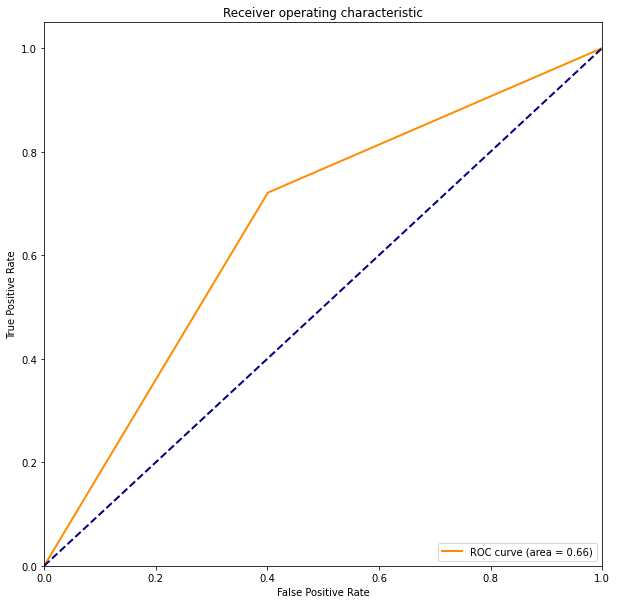

In [ ]:
# plot the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# find top 10 features
feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                      index = X_train.columns,  
                                        columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(10)

,importance
learner_days_since_registration,0.157468
days_since_last_payment,0.144874
cnt_days_since_last_activity,0.132293
cnt_days_active_before_payment_period,0.110243
cnt_days_active_during_payment_period,0.053873
cnt_courses_in_specialization,0.049978
is_subscription_started_with_free_trial,0.025377
learner_gender_male,0.023115
subscription_period_order_4.0,0.022657
learner_gender_unknown,0.019031


<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

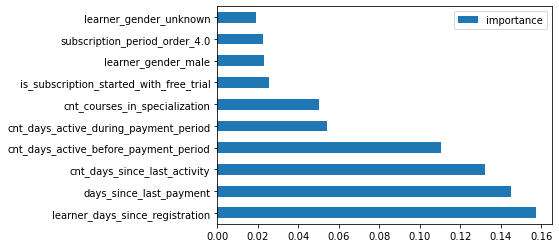

In [ ]:
# plot a barh plot of the top 10 features, sorted by importance
plt.figure(figsize=(10,10))
feature_importances.head(10).plot(kind='barh')

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 217,921 entries plus a header row attempting to predict the likelihood of retention for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `subscription_id` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`subscription_id` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts retention using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [ ]:
# preprocess the test data
processed_test_df = preprocess_data(test_df)

['specialization_domain', 'subscription_period_order', 'learner_country_group', 'learner_gender']


In [ ]:
processed_test_df.head()

,cnt_courses_in_specialization,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_other_revenue,days_since_last_payment,...,subscription_period_order_2,subscription_period_order_3,subscription_period_order_4,learner_country_group_Asia,learner_country_group_Europe,learner_country_group_LatAm,learner_country_group_MENA,learner_country_group_NorthAm,learner_gender_male,learner_gender_unknown
0,8,1,1,26,0,0,0,0,0,18,...,0,0,0,1,0,0,0,0,0,0
1,8,1,1,1781,1,1,1,1,1,13,...,0,0,1,0,0,0,0,1,0,1
2,6,1,1,279,1,1,1,1,1,26,...,1,0,0,0,0,0,0,1,0,0
3,4,0,0,645,1,0,1,0,0,8,...,0,0,0,0,0,1,0,0,0,0
4,5,1,1,81,0,0,0,0,0,9,...,0,1,0,0,0,0,0,1,1,0


In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = xgb_model.predict_proba(processed_test_df)[:, 1]
print(predicted_probability)

[0.6407012  0.75717413 0.8253608  ... 0.20880157 0.849811   0.56336397]


In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'subscription_id': test_df[['subscription_id']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 217,921 rows and 2 columns 'subscription_id' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(217921, 2)


,subscription_id,predicted_probability
0,-1flsPG4EeuOTBLG4RY78Q,0.640701
1,-3jgpo3XEeuquA5bylYGqQ,0.757174
2,-4iSgbBhEeutEwol7kuJnw,0.825361
3,-D1ayv64Eeuw4w5IkZJKbw,0.440710
4,-DJEc-L5Eeub2BLESLBCkw,0.633710
5,-EbzSDdgEeyiog5l139adw,0.585145
6,-GVVgmMxEeuQZgoplpe76w,0.569590
7,-H4Bil5DEeyGdgqSaUkc7Q,0.180744
8,-O-hHcevEeuPIA4yld1PaQ,0.381538
9,-VFHd3C_EeuyDgqvLkrnfQ,0.911681


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for grading. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 217921, 'The dataframe prediction_df should have 217921 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.


## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!